<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=550 height=450/></p>

<h3 style="text-align: center;"><b>"Глубокое обучение". Продвинутый поток</b></h3>

<h2 style="text-align: center;"><b>Семинар 6. Основы библиотеки PyTorch </b></h2>


<p style="align: center;"><img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png" width=400 height=100></p>

Этот ноутбук посвящён основам  библиотеки PyTorch.

<h3 style="text-align: center;"><b>Введение</b></h3>

В настоящее время существует множество фреймворков глубокого обучения. Разница между ними заключается во внутренних принципах вычислений. Например, в **[Caffe](http://caffe.berkeleyvision.org/)** и **[Caffe2](https://caffe2.ai/)** вы пишете код, используя некоторые «готовые блоки» "(как и $ LEGO ^ {TM} $ :). В **[TensorFlow](https://www.tensorflow.org/)** и **[Theano](http://deeplearning.net/software/theano/)** вы сначала объявляете граф вычислений, затем компилируйте его и используйте для вывода / обучения (`tf.session ()`). Кстати, теперь в TensorFlow (начиная с версии 1.10) есть функция [Eager Execution](https://www.tensorflow.org/guide/eager), которая может быть полезна для быстрого прототипирования и отладки. **[Keras](https://keras.io/)** - очень популярный и полезный фреймворк DL, который позволяет быстро реализовывать нейронный сети и имеет множество полезных функций.


<p style="align: center;"><img src="https://habrastorage.org/web/e3e/c3e/b78/e3ec3eb78d714a7993a6b922911c0866.png" width=500 height=500></p>  
<p style="text-align: center;"><i>Image credit: https://habr.com/post/334380/</i><p>

Мы будем использовать **PyTorch**, поскольку он активно развивается и поддерживается AI-сообществом 

<h3 style="text-align: center;"><b>Установка</b></h3>

Подробную инструкцию по установке PyTorch вы можете найти на [официальном сайте PyTorch](https://pytorch.org/).

## Синтаксис Фреймворка

In [151]:
# !pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113


In [152]:
import torch

Несколько фактов о PyTorch:
- динамический граф вычислений
- удобные модули `torch.nn` и `torchvision` для быстрого прототипирования нейронных сетей
- даже быстрее, чем TensorFlow на некоторых задачах
- позволяет легко использовать **GPU**

По своей сути PyTorch предоставляет две основные функции:

- n-мерный тензор, похожий на **numpy**, но может работать на графических процессорах
- Автоматическая дифференциация для построения и обучения нейронных сетей

Если бы PyTorch был формулой, она была бы такой:

$$PyTorch = NumPy + CUDA + Autograd$$

(CUDA - [wiki](https://en.wikipedia.org/wiki/CUDA))

Давайте посмотрим, как мы можем использовать PyTorch для работы с векторами и тензорами.

Напомним, что **тензор** - это многомерный вектор, например :

`x = np.array ([1,2,3])` - вектор = тензор с 1 размерностью (точнее: `(3,)`)

`y = np.array ([[1, 2, 3], [4, 5, 6]])` - матрица = тензор с двумя измерениями (`(2, 3)` в данном случае)

`z = np.array ([[[1, 2, 3], [4, 5, 6], [7, 8, 9]]],
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]]]) `-" куб "(3, 3, 3) = тензор с тремя измерениями (` ( 3, 3, 3) `в этом случае)


Одним из реальных примеров трехмерного тензора является **изображение**, оно имеет 3 измерения: `высота`, `ширина` и `глубина канала` (глубина канала = 3 для цветных изображений, 1 для оттенков серого). Вы можете думать об этом как о параллелепипеде, состоящем из действительных чисел.


### Типы Тензоров

В PyTorch мы будем использовать `torch.Tensor` (`FloatTensor`, `IntTensor`, `ByteTensor`) для всех вычислений.

Все типы:

In [153]:
torch.HalfTensor      # 16 бит, floating point
torch.FloatTensor     # 32 бита, floating point
torch.DoubleTensor    # 64 бита, floating point

torch.ShortTensor     # 16 бит, integer, signed
torch.IntTensor       # 32 бита, integer, signed
torch.LongTensor      # 64 бита, integer, signed

torch.CharTensor      # 8 бит, integer, signed
torch.ByteTensor      # 8 бит, integer, unsigned

torch.ByteTensor

Мы будем использовать только `torch.FloatTensor()` и `torch.IntTensor()`.

Начнем уже что-нибудь писать!

### Создание тензора

In [154]:
a = torch.FloatTensor([1, 2])
a


tensor([1., 2.])

In [155]:
a.shape

torch.Size([2])

In [156]:
b = torch.FloatTensor([[1,2,3], [4,5,6]])
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [157]:
b.shape

torch.Size([2, 3])

In [158]:
x = torch.FloatTensor(2,3,4)

In [159]:
x

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [160]:
x = torch.FloatTensor(100)
x

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [161]:
x = torch.IntTensor(45, 57, 14, 2)
x.shape

torch.Size([45, 57, 14, 2])

**Примечание:** если вы создаете `torch.Tensor` с помощью следующего конструктора, он будет заполнен мусором из "случайных номеров":

In [162]:
x = torch.IntTensor(3, 2, 4)
x

tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0]]], dtype=torch.int32)

### Инициализации тензоров

In [163]:
x1 = torch.FloatTensor(3, 2, 4)
x1.zero_()
x2 = torch.zeros(3, 2, 4)
x3 = torch.zeros_like(x1)

assert torch.allclose(x1, x2) and torch.allclose(x1, x3)

Инициализация случайного распределения

In [164]:
x = torch.randn((2,3))                # Normal(0, 1) с размером (2, 3)
x

tensor([[ 0.9255,  0.1110, -0.5723],
        [ 0.5208,  1.4329, -0.9788]])

In [165]:
x.random_(0, 10)                      # Дискретное равномерно U[0, 10]
x.uniform_(0, 1)                      # Равномерно U[0, 1]
x.normal_(mean=0, std=1)              # Нормальное со средним 0 и дисперсией 1
x.bernoulli_(p=0.5)                   # bernoulli with parameter p

tensor([[1., 1., 0.],
        [1., 0., 0.]])

## Функции в Torch 

У всех функций Numpy есть своя пара в Torch! Осталось теперь вспомнить numpy 🙂

https://github.com/torch/torch7/wiki/Torch-for-Numpy-users

### Изменение формы
`np.reshape()` == `torch.view()`:

In [166]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [167]:
b.view(3, 2).shape

torch.Size([3, 2])

In [168]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [169]:
b, b.stride()

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 (3, 1))

In [170]:
b.view(3, 2), b.view(3, 2).stride()  

(tensor([[1., 2.],
         [3., 4.],
         [5., 6.]]),
 (2, 1))

**Примечание:** `torch.view ()` создает новый тензор, но старый остается неизменным

In [171]:
b.view(-1, 2)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [172]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [173]:
b.T.stride(), b.is_contiguous(), b.T.is_contiguous()

((1, 3), True, False)

In [174]:
b.reshape(-1) # возвращает view или contigues тензор

tensor([1., 2., 3., 4., 5., 6.])

In [175]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

### Изменение типа тензора

In [176]:
a = torch.FloatTensor([1.5, 3.2, -7])

In [177]:
a.type_as(torch.IntTensor())

tensor([ 1,  3, -7], dtype=torch.int32)

In [178]:
a.to(torch.int32)

tensor([ 1,  3, -7], dtype=torch.int32)

In [179]:
a.type_as(torch.ByteTensor())

tensor([  1,   3, 249], dtype=torch.uint8)

In [180]:
a.to(torch.uint8)

tensor([  1,   3, 249], dtype=torch.uint8)

**Note:** `.type_as()` creates a new tensor, the old one remains unchanged

In [181]:
a

tensor([ 1.5000,  3.2000, -7.0000])

* Indexing is just like in `NumPy`:

In [182]:
a = torch.FloatTensor([[100, 20, 35], [15, 163, 534], [52, 90, 66]])
a

tensor([[100.,  20.,  35.],
        [ 15., 163., 534.],
        [ 52.,  90.,  66.]])

In [183]:
a[0, 0]

tensor(100.)

In [184]:
a[0:2, 1]

tensor([ 20., 163.])

### Арифметические операции

| операция | аналоги |
|:-:|:-:|
|`+`| `torch.add()` |
|`-`| `torch.sub()` |
|`*`| `torch.mul()` |
|`/`| `torch.div()` |

#### Сложение

In [185]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [186]:
a + b

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [187]:
a.add(b)

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [188]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [189]:
a + b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

#### Вычитание

In [190]:
a - b

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [191]:
a.sub(b) # copy

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [192]:
a.sub_(b) # inplace

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

#### Умножение (поэлементное)

In [193]:
a * b

tensor([[-2.0000e+00, -8.0000e+00, -1.8000e+01],
        [-2.0000e+02, -8.0000e+02, -1.8000e+03],
        [-2.0000e+04, -8.0000e+04, -1.8000e+05]])

In [194]:
a.mul(b)

tensor([[-2.0000e+00, -8.0000e+00, -1.8000e+01],
        [-2.0000e+02, -8.0000e+02, -1.8000e+03],
        [-2.0000e+04, -8.0000e+04, -1.8000e+05]])

#### Деление (поэлементное):

In [195]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [196]:
a / b

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

In [197]:
a.div(b)

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

**Примечание:** все эти операции создают новые тензоры, старые тензоры остаются неизменными.

In [198]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [199]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

### Операторы сравнения

In [200]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [201]:
a == b

tensor([[False, False, False],
        [False, False, False],
        [ True,  True,  True]])

In [202]:
a != b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

In [203]:
a < b

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

In [204]:
a > b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

### Использование индексации по логической маске

In [205]:
a[a > b]

tensor([ 1.,  2.,  3., 10., 20., 30.])

In [206]:
b[a == b]

tensor([100., 200., 300.])

### Поэлементное применение **универсальных функций**

In [207]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

In [208]:
a.sin()

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [209]:
torch.sin(a)

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [210]:
a.tan()

tensor([[ 1.5574, -2.1850, -0.1425],
        [ 0.6484,  2.2372, -6.4053],
        [-0.5872, -1.7925, 45.2447]])

In [211]:
a.exp()

tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01],
        [2.2026e+04, 4.8517e+08, 1.0686e+13],
        [       inf,        inf,        inf]])

In [212]:
a.log()

tensor([[0.0000, 0.6931, 1.0986],
        [2.3026, 2.9957, 3.4012],
        [4.6052, 5.2983, 5.7038]])

In [213]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [214]:
b.abs()

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

### Агрегация и работа с осями
#### sum, mean, max, min:

In [215]:
a.sum(dim=1)

tensor([  6.,  60., 600.])

In [216]:
a.mean()

tensor(74.)

#### Применение функции вдоль оси

In [217]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [218]:
a.sum(dim=0)

tensor([111., 222., 333.])

In [219]:
a.sum(dim=1)

tensor([  6.,  60., 600.])

In [220]:
a.max()

tensor(300.)

In [221]:
a.max(0)

torch.return_types.max(
values=tensor([100., 200., 300.]),
indices=tensor([2, 2, 2]))

**Примечание:** второй тензор, возвращаемый `.max()`, содержит индексы элементов max вдоль этой оси. Например. в этом случае `a.max ()` вернула `(100, 200, 300)`, которые являются минимальными элементами по оси 0 (вдоль столбцов), а их индексы по оси 0 равны `(2, 2, 2)`.


#### Фиктивные оси

Иногда очень сложно бывает разобраться, как правильно выбрать оси для применения операций с многомерными массивами. Поэтому сейчас мы решим на эту тему пару задач.
Сначала посмотрим, как создавать у массивов новые фиктивные оси, это нам пригодится.

In [222]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

a[:, None, :].shape

torch.Size([3, 1, 3])

In [223]:
a[:, :, None]

tensor([[[  1.],
         [  2.],
         [  3.]],

        [[ 10.],
         [ 20.],
         [ 30.]],

        [[100.],
         [200.],
         [300.]]])

#### Безобидная задача на кумулятивные суммы
Дана матрица $M \times N$. Напишите функцию, которая возвращает вектор средних значений по вертикали. 



In [224]:
def vertical_means(A):
    """
    param A: torch.tensor[m,n]
    """

    result = A.mean(dim=0)

    return result # <YOUR CODE>

A = torch.FloatTensor([[1, 4], 
                       [2, 7]] )

vertical_means(A)

tensor([1.5000, 5.5000])

**Проблемы:**

* Что такое вертикальная ось? 
* По какой оси необходимо суммировать?
* Как не ошибиться?

**Ответ:** Операции всегда производятся по той оси, которая **исчезнет** после применения операции.

#### Задача на нормализацию изображения
Реализуйте функцию ``normalize_pictures(A)``, которая принимает на вход четырёхмерный тензор --- батч из ``batch_size`` изображений, каждое из которых является трехмерным тензором формы (num_channels, width, height). Нужно стандартизировать изображение по каждому каналу, то есть сделать так, чтобы среднее значение яркости каждого канала (по всем изображениям и всем пикселям) было равно 0, а стандартное отклонение --- 1.

In [225]:
def normalize_pictures(A):
    """
    param A: torch.Tensor[batch_size, num_channels, width, height]
    """

    m = A.mean(dim=(2,3))
    sigma = A.std(dim =(2, 3))

    result = (A - m[:, :, None, None])/sigma[:, :, None, None]


    return result

In [226]:
batch = torch.randint(0, 156, (64, 3, 300, 300), dtype=torch.float32)
batch.mean(dim=(2,3)).shape

torch.Size([64, 3])

In [227]:
batch = torch.randint(0, 256, (64, 3, 300, 300), dtype=torch.float32)

B = normalize_pictures(batch)
print(B.mean(dim=(2,3)))
# print(B.std(dim=(2,3)))

tensor([[ 1.3902e-08,  3.2213e-09, -2.1193e-08],
        [-5.1710e-09, -2.8568e-08, -4.1114e-08],
        [ 4.3403e-08,  2.8483e-08, -1.2445e-08],
        [ 3.1959e-08,  6.0738e-08, -7.4599e-09],
        [ 4.6031e-08,  4.8150e-08, -3.5519e-08],
        [ 3.3061e-09, -2.9161e-08, -2.2549e-08],
        [ 1.6234e-08, -2.0684e-08,  3.4248e-08],
        [ 4.2386e-08,  1.8777e-08,  1.8480e-08],
        [ 3.9164e-08,  4.9167e-08, -3.7299e-08],
        [ 1.1020e-09,  4.6624e-08,  2.6449e-08],
        [-2.3736e-09,  5.0524e-08,  3.2722e-08],
        [ 2.5431e-08,  1.5555e-08, -5.0947e-08],
        [-2.8653e-08,  1.0808e-08, -3.6282e-08],
        [ 2.0345e-09,  3.1535e-08,  4.5204e-08],
        [-1.2567e-08, -2.8144e-08, -4.8108e-08],
        [-4.9676e-08, -1.1698e-08,  2.7127e-09],
        [ 2.9543e-08, -4.1114e-09,  4.5353e-09],
        [ 3.9842e-08,  2.1023e-08,  4.3127e-08],
        [ 5.2558e-09, -3.7384e-08, -4.1368e-08],
        [ 9.2824e-09,  2.5686e-08,  4.9379e-09],
        [ 3.8486e-08

## Матричные операции

#### Транспонирование тензора

In [228]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [229]:
a.t()

tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])

Это тоже не inplace-операция:

In [230]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

#### Скалярное произведение векторов

In [231]:
a = torch.FloatTensor([1, 2, 3, 4, 5, 6])
b = torch.FloatTensor([-1, -2, -4, -6, -8, -10])

In [232]:
a.dot(b)

tensor(-141.)

In [233]:
a.shape, b.shape

(torch.Size([6]), torch.Size([6]))

In [234]:
a @ b

tensor(-141.)

In [235]:
type(a)

torch.Tensor

In [236]:
type(b)

torch.Tensor

In [237]:
type(a @ b)

torch.Tensor

#### Матричное произведение

In [238]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [239]:
a.mm(b)

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [240]:
a @ b

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

перемножение по 2 последним размерностям происходит

In [241]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1], [-10], [100]])

In [242]:
print(a.shape, b.shape)

torch.Size([3, 3]) torch.Size([3, 1])


In [243]:
a @ b

tensor([[  279.],
        [ 2790.],
        [27900.]])

Тензор `b` можно развернуть в одномерный массив с помощью функции `torch.view(-1)`, чтобы результат был вектором

In [244]:
b

tensor([[ -1.],
        [-10.],
        [100.]])

In [245]:
b.view(-1)

tensor([ -1., -10., 100.])

In [246]:
a @ b.view(-1)

tensor([  279.,  2790., 27900.])

In [247]:
a.mv(b.view(-1))

tensor([  279.,  2790., 27900.])

In [248]:
y = torch.Tensor(2, 3, 4, 5)
z = torch.Tensor(2, 3, 5, 6)
(y @ z).shape

torch.Size([2, 3, 4, 6])

## Конвертация
#### Конвертация из Numpy в Pytorch:

In [249]:
import numpy as np

a = np.random.rand(3, 3)
a

array([[0.58671559, 0.04294063, 0.77974277],
       [0.88076679, 0.64456829, 0.2873214 ],
       [0.42153715, 0.61741129, 0.15883284]])

In [250]:
b = torch.from_numpy(a)
b

tensor([[0.5867, 0.0429, 0.7797],
        [0.8808, 0.6446, 0.2873],
        [0.4215, 0.6174, 0.1588]], dtype=torch.float64)

**Внимание!** `a` и `b` хранятся в одной и той же ячейке данных. Если именить один тензор, то изменится и другой.

In [251]:
b -= b
b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [252]:
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### Конвертация из Torch в Numpy

In [253]:
a = torch.FloatTensor(2, 3, 4)
a

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [254]:
type(a)

torch.Tensor

In [255]:
x = a.numpy()
x

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]], dtype=float32)

In [256]:
x.shape

(2, 3, 4)

In [257]:
type(x)

numpy.ndarray

In [258]:
x -= x

In [259]:
a

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

#### Задание. Реализация функции forward
Реализуйте функцию `forward_pass(X, w)` для одного нейрона нейронной сети с активацией ``sigmoid``. Используйте библиотеку PyTorch

<img src='https://radioprog.ru/uploads/media/articles/0001/05/267ad35a9e64a7b92c2e3b94940f686816ea6bf8.jpeg'>

In [260]:
def forward_pass(X, w):

  logits = X @ w
  result  = torch.sigmoid(logits)

  return result


  


In [261]:
X = torch.FloatTensor([[-5, 5], [2, 3], [1, -1]])
print(X.shape)
w = torch.FloatTensor([[-0.5], [2.5]])
print(w.shape)
result = forward_pass(X, w)
print('result: {}'.format(result))

torch.Size([3, 2])
torch.Size([2, 1])
result: tensor([[1.0000],
        [0.9985],
        [0.0474]])


## <h1 style="text-align: center;"><a href="https://ru.wikipedia.org/wiki/CUDA">CUDA</a></h3>

CUDA --- это программно-аппаратная архитектура параллельных вычислений, которая позволяет существенно увеличить вычислительную производительность благодаря использованию графических процессоров фирмы Nvidia. Для нас CUDA --- это драйвер, который позволяет нам проводить вычисления на GPU.

[CUDA documentation](https://docs.nvidia.com/cuda/)

Для вычислений на Pytorch мы можем использовать как CPU (Central Processing Unit), так и GPU (Graphical Processing Unit). Между ними можно легко переключаться, и это очень важно!

In [262]:
x = torch.FloatTensor(1024, 10024).uniform_()
x

tensor([[0.5094, 0.8020, 0.0422,  ..., 0.4082, 0.1388, 0.4710],
        [0.3404, 0.7740, 0.7849,  ..., 0.9245, 0.5953, 0.7026],
        [0.4630, 0.4125, 0.6305,  ..., 0.7151, 0.0428, 0.5772],
        ...,
        [0.7098, 0.7889, 0.9407,  ..., 0.8802, 0.5298, 0.6337],
        [0.2254, 0.5353, 0.6858,  ..., 0.8295, 0.0024, 0.9817],
        [0.4010, 0.6858, 0.1210,  ..., 0.7775, 0.4317, 0.7633]])

In [263]:
x.is_cuda

False

#### Кладём тензор на GPU

In [264]:
!

In [265]:
!nvidia-smi

"nvidia-smi" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [266]:
x = x.cuda(0)

In [267]:
!nvidia-smi

"nvidia-smi" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [268]:
x

tensor([[0.5094, 0.8020, 0.0422,  ..., 0.4082, 0.1388, 0.4710],
        [0.3404, 0.7740, 0.7849,  ..., 0.9245, 0.5953, 0.7026],
        [0.4630, 0.4125, 0.6305,  ..., 0.7151, 0.0428, 0.5772],
        ...,
        [0.7098, 0.7889, 0.9407,  ..., 0.8802, 0.5298, 0.6337],
        [0.2254, 0.5353, 0.6858,  ..., 0.8295, 0.0024, 0.9817],
        [0.4010, 0.6858, 0.1210,  ..., 0.7775, 0.4317, 0.7633]],
       device='cuda:0')

In [269]:
x = x.cpu()
# !nvidia-smi

torch.cuda.empty_cache()
# !nvidia-smi

In [270]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

x = x.to(device)
x

tensor([[0.5094, 0.8020, 0.0422,  ..., 0.4082, 0.1388, 0.4710],
        [0.3404, 0.7740, 0.7849,  ..., 0.9245, 0.5953, 0.7026],
        [0.4630, 0.4125, 0.6305,  ..., 0.7151, 0.0428, 0.5772],
        ...,
        [0.7098, 0.7889, 0.9407,  ..., 0.8802, 0.5298, 0.6337],
        [0.2254, 0.5353, 0.6858,  ..., 0.8295, 0.0024, 0.9817],
        [0.4010, 0.6858, 0.1210,  ..., 0.7775, 0.4317, 0.7633]],
       device='cuda:0')

Умножим два тензора в GPU и вернём результат обратно на CPU:

In [271]:
a = torch.FloatTensor(10000, 10000).uniform_()
b = torch.FloatTensor(10000, 10000).uniform_()
c = a.cuda().mul(b.cuda()).cpu()

In [272]:
c

tensor([[0.0749, 0.4298, 0.0621,  ..., 0.0786, 0.1826, 0.2092],
        [0.1498, 0.0196, 0.2134,  ..., 0.0490, 0.2268, 0.3416],
        [0.3424, 0.1839, 0.2715,  ..., 0.0299, 0.7329, 0.7007],
        ...,
        [0.1081, 0.0164, 0.0311,  ..., 0.0821, 0.0064, 0.3116],
        [0.0078, 0.3460, 0.3446,  ..., 0.1427, 0.0611, 0.2601],
        [0.4400, 0.2359, 0.1064,  ..., 0.4674, 0.1576, 0.4995]])

In [273]:
a

tensor([[0.2264, 0.5161, 0.5905,  ..., 0.0972, 0.6576, 0.2706],
        [0.1657, 0.1123, 0.2750,  ..., 0.1124, 0.8417, 0.6758],
        [0.5940, 0.4662, 0.4076,  ..., 0.1616, 0.7653, 0.8825],
        ...,
        [0.8325, 0.2485, 0.1095,  ..., 0.1245, 0.0510, 0.3765],
        [0.1669, 0.7587, 0.8096,  ..., 0.3053, 0.1147, 0.5670],
        [0.5212, 0.6100, 0.7850,  ..., 0.4890, 0.4802, 0.9990]])

Тензоры из разных областей памяти не совместимы:

In [274]:
a = torch.FloatTensor(10000, 10000).uniform_().cpu()
b = torch.FloatTensor(10000, 10000).uniform_().cuda()

In [275]:
a + b

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

### Пример работы на GPU

In [276]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [277]:
x = torch.FloatTensor(5, 5, 5).uniform_()

# проверить наличие CUDA (NVIDIA GPU)
if torch.cuda.is_available():
    # получить имя устройства CUDA
    device = torch.device('cuda')          # Объект CUDA-устройства
    y = torch.ones_like(x, device=device)  # создаем тензор на GPU
    x = x.to(device)                       # или просто `.to("cuda")`
    z = x + y
    print(z)
    # вы можете установить тип во время операции `.to`
    print(z.to("cpu", torch.double))

tensor([[[1.8498, 1.3829, 1.5700, 1.4069, 1.9648],
         [1.7624, 1.1818, 1.9036, 1.8637, 1.0211],
         [1.7037, 1.0624, 1.8125, 1.0778, 1.2273],
         [1.4416, 1.7548, 1.2045, 1.6680, 1.1862],
         [1.1024, 1.8871, 1.4845, 1.8195, 1.6980]],

        [[1.3008, 1.0047, 1.0751, 1.7867, 1.8475],
         [1.2202, 1.2686, 1.1786, 1.1763, 1.4631],
         [1.5103, 1.8453, 1.8890, 1.9611, 1.9477],
         [1.8238, 1.7780, 1.5903, 1.0876, 1.0309],
         [1.8958, 1.2993, 1.2081, 1.0774, 1.9327]],

        [[1.8989, 1.8897, 1.3342, 1.2444, 1.5034],
         [1.5382, 1.4275, 1.8844, 1.7886, 1.2430],
         [1.9355, 1.1291, 1.1792, 1.0542, 1.3050],
         [1.7004, 1.7787, 1.9279, 1.2818, 1.5630],
         [1.4103, 1.0681, 1.6777, 1.0254, 1.9092]],

        [[1.2098, 1.8120, 1.1003, 1.3820, 1.6170],
         [1.8473, 1.6248, 1.4161, 1.4097, 1.7397],
         [1.1703, 1.2968, 1.3962, 1.2707, 1.0618],
         [1.0788, 1.2498, 1.7689, 1.8459, 1.0639],
         [1.7932, 1.1945,

## AutoGrad

За что мы любим PyTorch --- за то, что в нём можно автоматически дифференцировать функции! Об этом можно было бы только мечтать в Numpy. Дифференцирование функций происходит по формуле производной композиции.

**Правило производной композиции (a.k.a. backpropagation)**

Пусть есть функция $f(w(\theta))$. Вычислим её производную:
$${\frac  {\partial{f}}{\partial{\theta}}}
={\frac  {\partial{f}}{\partial{w}}}\cdot {\frac  {\partial{w}}{\partial{\theta}}}$$


*Как рассказывалось на лекции, в многомерном случае можно записать аналог этой формулы:*
$$
D_\theta(f\circ w) = D_{w(\theta)}(f)\circ D_\theta(w)
$$

Простой пример обратного распространения градиента:

$$y = \sin \left(x_2^2(x_1 + x_2)\right)$$

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0010465515004099-gr1.jpg" width=700></img>


Autograd позволяет производить автоматическое дифференцирование для всех операций на тензорах. Граф вычислений, в отличие от Tensorflow, строится динамически. Давайте посмотрим, как это работает.

#### Задание. Реализуйте обучение в логистической регрессии

In [278]:
# Разберем пример: применим линейную регрессию цен на жилье в Бостоне.

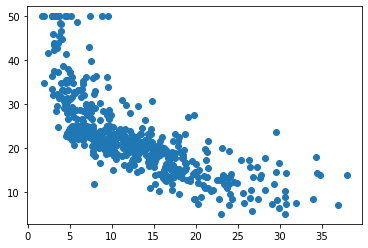

In [279]:
import matplotlib.pyplot as plt
import torch
%matplotlib inline

from sklearn.datasets import load_boston
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)

In [280]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [281]:
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

# propagete gradients
loss.backward()

In [282]:
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-47.3514])
dL/db = 
 tensor([-45.0656])


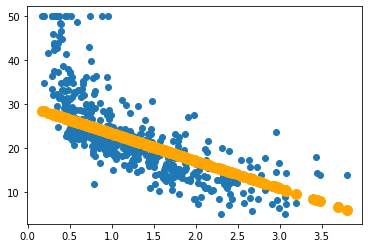

loss =  44.59417


In [283]:
from IPython.display import clear_output

for i in range(100):

    y_pred = w * x + b

    # Вычисляем функцию ошибок
    loss = torch.mean((y_pred - y)**2)

    # Вычисляем градиенты
    loss.backward()


    # Делаем шаг градиентного спуска по матрице весов
    w.data -= 0.05*w.grad.data
    b.data -= 0.05*b.grad.data

    # обнуляем градиенты
    w.grad.data.zero_()
    b.grad.data.zero_()



    # the rest of code is just bells and whistles
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

Посмотрим градиенты на примере двухслойной сети

In [284]:
dtype = torch.float
device = torch.device("cuda:0")
# device = torch.device("cuda:0") # Раскомментируйте это, чтобы запустить на GPU

# N - размер батча; D_in - входной размер;
# H - размер скрытого слоя; D_out - размер вывода.
N, D_in, H, D_out = 64, 3, 3, 10
N, D_in, H, D_out = 64, 3, 3, 10

# Создание случайных тензоров для хранения входных и выходных данных.
# Настройка requires_grad = False указывает, что нам не нужно вычислять градиенты
# по отношению к этим тензорам во время обратного прохода.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Создаем тензоры случайных весов.
# Настройка requires_grad = True указывает, что мы хотим вычислять градиенты с
# уважение к этим тензорам во время обратного прохода.

# Create random Tensors for weights.
# Установка requires_grad = True указывает, что мы хотим вычислить градиенты 
# относительно этих тензоров во время обратного прохода.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

In [285]:
y_pred = (x @ w1).clamp(min=0).matmul(w2)
loss = (y_pred - y).pow(2).sum()

# вычисляем градиенты
loss.backward()

In [286]:
print((y_pred - y).pow(2).sum())

tensor(2452.5984, device='cuda:0', grad_fn=<SumBackward0>)


In [287]:
w1.grad, w2.grad

(tensor([[-515.5452,  377.9768,  467.4662],
         [-246.9591,  151.4240, -587.7330],
         [  72.3091, 1022.6586,  308.3148]], device='cuda:0'),
 tensor([[  32.8744, -230.9286, -116.9625, -111.7165,   76.9085,    4.3486,
            86.4205,  -19.8309,  -32.9424,  147.6923],
         [  38.8393, -296.5771, -298.2217, -277.1532,   91.3842,   27.1833,
            50.0095,  196.9937,  221.0145,  179.0955],
         [ -42.5871, -119.5448, -151.6071, -151.5839,   61.0245,   -6.1076,
           138.7003,  102.8031,   97.4845,  151.8627]], device='cuda:0'))

In [288]:
loss.grad # нет доступа к нелистовым градиентам в дереве AD

In [289]:
# заставляем переменную запоминать градиенты фнукции потерь
y_pred = (x @ w1).clamp(min=0).matmul(w2)
y_pred.retain_grad()

loss = (y_pred - y).pow(2).sum()
loss.retain_grad() # это сохранит градиент для loss

loss.backward()

In [290]:
loss.grad

tensor(1., device='cuda:0')

In [291]:
x.grad # не требует градиента

In [292]:
y.grad # не требует градиента

**Замечание:** Градиенты помещаются в поле `.grad` тензоров, на которых они вычисляются.

In [293]:
w1

tensor([[-1.2788,  0.7979,  0.9255],
        [-0.3427,  0.5594, -0.7766],
        [ 0.1299,  1.5285,  0.1700]], device='cuda:0', requires_grad=True)

## это отключает вычисление градиентов

In [294]:
with torch.no_grad():
  
    pass

## Дополнительные материалы

*1). Official PyTorch tutorials: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py*

*2). arXiv article about the deep learning frameworks comparison: https://arxiv.org/pdf/1511.06435.pdf*

*3). Useful repo with different tutorials: https://github.com/yunjey/pytorch-tutorial*

*4). Facebook AI Research (main contributor of PyTorch) website: https://facebook.ai/developers/tools*